<a href="https://colab.research.google.com/github/vikpy/DLSem3/blob/master/M1_Test_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pyforest 
from pyforest import * 

  Created wheel for pyforest: filename=pyforest-1.0.3-py2.py3-none-any.whl size=13715 sha256=15ea525415e4a584c6e3f3011213d6089f8a151de054bbd0c41c4cbad041a792
  Stored in directory: /root/.cache/pip/wheels/af/0b/39/340a7f15fc8d4ff5ab50847b28789afea04452a9d51b9721b5
Successfully built pyforest


# Q.1 Download three classes of data from ImageNet with wnid=n02111277, n02110341 and n02109961. Organize data into train , test and validate sets with 100, 50, 50 images respectively(2 Marks)

Ans:

In [3]:
from bs4 import BeautifulSoup
import numpy as np
import requests
import cv2
import PIL.Image
import urllib
import os
import pandas as pd



wnids = {
         
         'class1' : 'n02111277',
         
         'class2' : 'n02110341',

         'class3' : 'n02109961'

         }
image_net_path = 'http://www.image-net.org/api/text/imagenet.synset.geturls?wnid='
pages = {}
for wnid in wnids.keys():
  temp = requests.get(image_net_path + wnids[wnid])
  pages[wnid] = str(BeautifulSoup(temp.content, 'html.parser')).split('\r\n')


In [4]:
len(pages["class1"]), len(pages["class2"]), len(pages["class3"])

(1715, 1400, 1541)

In [5]:
# Making directories for the train set 
!mkdir /content/train 
!mkdir /content/train/class1 
!mkdir /content/train/class2 
!mkdir /content/train/class3

# making directories for the test set
!mkdir /content/validation 
!mkdir /content/validation/class1 
!mkdir /content/validation/class2 
!mkdir /content/validation/class3 

# making directories for the test set 
!mkdir /content/test/ 
!mkdir /content/test/test 

In [6]:
def url_to_image(url):
  import numpy as np
  import cv2
  import urllib
  resp = urllib.request.urlopen(url)
  image = np.asarray(bytearray(resp.read()), dtype="uint8")
  image = cv2.imdecode(image, cv2.IMREAD_COLOR)
 
	# return the image
  return image

In [7]:
# Creating the training examples 


n_of_training_images=100       #the number of training images to use

for class_ in pages:
  for progress in range(n_of_training_images):
      if(progress%20==0):
          print(progress)
      if not pages[class_][progress] == None:
        try:
          I = url_to_image(pages[class_][progress])
          if (len(I.shape)) == 3: #check if the image has width, length and channels
            save_path = '/content/train/' + class_ + '/img'+str(progress)+'.jpg'#create a name of each image
            cv2.imwrite(save_path,I)
        except:
          None

0
20
40
60
80
0
20
40
60
80
0
20
40
60
80


In [8]:
# Creating the validation examples 

for class_ in pages:
  for progress in range(50):
      if(progress%20==0):
          print(progress)
      if not pages[class_][n_of_training_images + progress] == None:
        try:
          I = url_to_image(pages[class_][n_of_training_images + progress])
          if (len(I.shape)) == 3: #check if the image has width, length and channels
            save_path = '/content/validation/' + class_ + '/img'+str(n_of_training_images + progress)+'.jpg'#create a name of each image
            cv2.imwrite(save_path,I)
        except:
          None

0
20
40
0
20
40
0
20
40


In [9]:
for class_ in pages:
  for progress in range(50):
      if(progress%20==0):
          print(progress)
      if not pages[class_][n_of_training_images + progress + 50] == None:
        try:
          I = url_to_image(pages[class_][n_of_training_images + progress + 50])
          if (len(I.shape)) == 3: #check if the image has width, length and channels
            save_path = '/content/test/test/' + str(class_) +  '_' +str(n_of_training_images + progress + 50) +'.jpg'#create a name of each image
            cv2.imwrite(save_path,I)
        except:
          None

0
20
40
0
20
40
0
20
40


In [67]:
# Path to the train folder
original_test = '/content/test/test'
 
filenames = os.listdir(original_test)
categories = []
for filename in filenames:
    category = filename.split('_')[0]
    if category == 'class1':
        categories.append('class1')
    elif category == 'class2' :
        categories.append('class2')
    else : 
        categories.append('class3')

data_test = pd.DataFrame({'filename':filenames,'label':categories})

data_test.to_csv("original_test.csv",index=False)

# Q.2 Build a classification model for image recognition for images in Q1(6 Marks)

Ans:

In [60]:
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint, EarlyStopping
import keras


# Image Augmentation

trainval_datagen = ImageDataGenerator(
    rescale=1./255, 
    horizontal_flip=True #,
 #   rotation_range=180,
 #   width_shift_range=0.3,
 #   height_shift_range=0.3,
 #   shear_range=0.4,
 #   zoom_range=0.4,
 #   fill_mode = 'nearest'
)


test_datagen = ImageDataGenerator(
    rescale=1./255
)

# Flowing the data from the directory 
batch_size = 32
train_generator = trainval_datagen.flow_from_directory(directory='/content/train/',
                                                       seed=123,
                                                       shuffle=True,
                                                       color_mode='rgb',
                                                       class_mode='categorical',
                                                       batch_size=batch_size,
                                                       target_size=(150,150))

val_generator = trainval_datagen.flow_from_directory(directory='/content/validation/',                                                      
                                                       seed=123,
                                                       shuffle=True,                                                       
                                                       color_mode='rgb',
                                                       class_mode='categorical',
                                                       batch_size=batch_size,                                                     
                                                       target_size=(150,150))



test_generator = test_datagen.flow_from_directory(directory='/content/test/',
                                                  seed=123,
                                                  shuffle=False,                                                  
                                                  class_mode=None,
                                                  color_mode='rgb',
                                                  target_size=(150,150))



Found 219 images belonging to 3 classes.
Found 95 images belonging to 3 classes.
Found 100 images belonging to 1 classes.


In [61]:
# Using Initializers

#initializers = keras.initializers.glorot_normal()
#initializers = keras.initializers.glorot_uniform()
#initializers = keras.initializers.he_uniform()
initializers = keras.initializers.lecun_uniform()


# Building the model 
model = Sequential()

model.add(Conv2D(512, (150,150), padding='valid', activation='relu', input_shape=(150,150,3)))

model.add(Flatten())

model.add(Dense(512, activation='relu', kernel_initializer=initializers, bias_initializer=initializers))

model.add(Dense(512, activation='relu', kernel_initializer=initializers, bias_initializer=initializers))

model.add(Dense(256, activation='relu', kernel_initializer=initializers, bias_initializer=initializers))

model.add(Dense(256, activation='relu', kernel_initializer=initializers, bias_initializer=initializers))

model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy',  optimizer= 'sgd', metrics=['accuracy'])
#model.compile(loss='categorical_crossentropy',  optimizer= 'rmsprop', metrics=['accuracy'])
#model.compile(loss='categorical_crossentropy',  optimizer= 'adam', metrics=['accuracy'])

In [62]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 1, 1, 512)         34560512  
_________________________________________________________________
flatten_14 (Flatten)         (None, 512)               0         
_________________________________________________________________
dense_56 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_57 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_58 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_59 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_60 (Dense)             (None, 3)               

In [82]:
# Fitting the models and calling the call backs
filepath="m1_test.{epoch:02d}-{val_loss:.2f}.hdf5"
earlystopping = EarlyStopping(monitor='val_loss', verbose=1, patience=4, mode="min")
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, mode="max")
model_history = model.fit_generator(generator=train_generator, validation_data=val_generator, epochs=30, verbose=1 , callbacks=[earlystopping, checkpoint])

Epoch 1/30
7/7 [==============================] - ETA: 0s - loss: 0.7605 - accuracy: 0.6438
Epoch 00001: saving model to m1_test.01-0.87.hdf5
7/7 [==============================] - 6s 903ms/step - loss: 0.7605 - accuracy: 0.6438 - val_loss: 0.8706 - val_accuracy: 0.5474
Epoch 2/30
7/7 [==============================] - ETA: 0s - loss: 0.8713 - accuracy: 0.6027
Epoch 00002: saving model to m1_test.02-0.93.hdf5
7/7 [==============================] - 6s 877ms/step - loss: 0.8713 - accuracy: 0.6027 - val_loss: 0.9283 - val_accuracy: 0.5789
Epoch 3/30
7/7 [==============================] - ETA: 0s - loss: 0.7853 - accuracy: 0.6667
Epoch 00003: saving model to m1_test.03-0.93.hdf5
7/7 [==============================] - 6s 881ms/step - loss: 0.7853 - accuracy: 0.6667 - val_loss: 0.9262 - val_accuracy: 0.5895
Epoch 4/30
7/7 [==============================] - ETA: 0s - loss: 0.7114 - accuracy: 0.6712
Epoch 00004: saving model to m1_test.04-0.90.hdf5
7/7 [==============================] - 6s 899

In [79]:
model_history.history

{'accuracy': [0.6301369667053223,
  0.6392694115638733,
  0.5981734991073608,
  0.6164383292198181,
  0.6027397513389587,
  0.6073059439659119],
 'loss': [0.7991594076156616,
  0.9345097541809082,
  0.8130852580070496,
  0.8011435866355896,
  0.9077532887458801,
  0.8028143644332886],
 'val_accuracy': [0.557894766330719,
  0.5263158082962036,
  0.557894766330719,
  0.5157894492149353,
  0.4736842215061188,
  0.5263158082962036],
 'val_loss': [0.8904199004173279,
  0.8780956268310547,
  0.9162266850471497,
  0.8896083831787109,
  0.9683179259300232,
  0.92213374376297]}

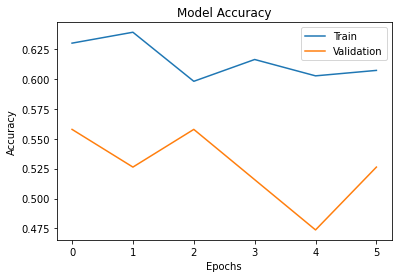

In [80]:
import matplotlib.pyplot as plt
plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["Train", "Validation"], loc="best")
plt.show()

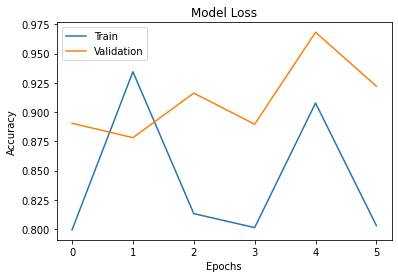

In [81]:

import matplotlib.pyplot as plt
plt.plot(model.history.history["loss"])
plt.plot(model.history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["Train", "Validation"], loc="best")
plt.show()


model with horizontal flip acc->0.557

model with lecun initializer and early stopping acc->0.578

In [64]:
# Evaluating the model
model.evaluate_generator(generator=val_generator)

[0.8520916700363159, 0.5789473652839661]

In [65]:
# Predicting test 
test_generator.reset()
pred = model.predict_generator(test_generator, verbose=1)

Instructions for updating:
Please use Model.predict, which supports generators.
4/4 [==============================] - 0s 75ms/step


In [66]:
# predicted values 
pred[:5]

array([[0.65056187, 0.14011897, 0.20931916],
       [0.8653315 , 0.05978992, 0.0748787 ],
       [0.12330588, 0.39836752, 0.47832656],
       [0.82925063, 0.0722827 , 0.09846672],
       [0.06340387, 0.4833129 , 0.45328322]], dtype=float32)

In [69]:
# test values
df_test = pd.read_csv("/content/original_test.csv")
df_test.head()

,filename,label
0,class1_165.jpg,class1
1,class2_169.jpg,class2
2,class3_151.jpg,class3
3,class2_160.jpg,class2
4,class2_196.jpg,class2


#List the following experimental setting used for the classification model 2 in Q2 for obtaining +80% accuracy on test set

● Data augmentation techniques used

Ans: Tried rescale, horizontal flip, rotation, width shift, height shift, shear range, zoom.
Got better accuracy for rescale and horizontal flip

● Hyper-parameters of data augmentation techniques

Ans:


---


    rescale=1./255, 

    horizontal_flip=True,

Tired the following, did not get good accuracy

    rotation_range=90,

    width_shift_range=0.3,

    height_shift_range=0.3,

    shear_range=0.4,

    zoom_range=0.4,
    
    fill_mode = 'nearest'


---



● Hyper-parameters of the classification model

Ans:

Following are the hyper parameters of the model 

---

__Model: "sequential"__
_________________________________________________________________


Layer 1:

Conv2D), (None, 1, 1, 512) , activation=relu, image with padding

Layer 2:

(Flatten),(None, 512) 

Layer 3:

(Dense),(None, 512), activation=relu

Layer 4:

(Dense),(None, 512), activation=relu

Layer 5:

(Dense),(None, 512), activation=relu

Layer 6:

(Dense),(None, 512), activation=relu

Layer 7:

(Dense),(None, 3), activation=softmax

---

● Plot the accuracy vs validation accuracy

Ans: Done in above cells

● Plot loss vs validation loss

Ans: Done in above cells


● Plot model summary

Ans: Done in above cells


● Settings of callbacks

Ans: 
---

__Early Stopping Setting__ : EarlyStopping(monitor='val_loss', verbose=1, patience=4, mode="min")

__Model Check Point Setting__: 

ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, mode="max")

---

● Initializers and Optimizers and settings

Ans:

---

*Optimizers*: tried ADAM, RMSPROP and SGD. SGD was giving better accuracy amongst all three optimizers


*Initializers*: tried glorat normal, he uniform, glorat uniform and lecun uniform. lecun uniform gave better accuracy

---


● Metrics and loss function setting

Ans:
---

metrics=['accuracy']

loss =['categorical_crossentropy']

---